In [1]:
install.packages(c("survival", "survminer"))


Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘matrixStats’, ‘RcppArmadillo’, ‘zip’, ‘SparseM’, ‘MatrixModels’, ‘conquer’, ‘sp’, ‘openxlsx’, ‘minqa’, ‘nloptr’, ‘statmod’, ‘RcppEigen’, ‘carData’, ‘abind’, ‘pbkrtest’, ‘quantreg’, ‘maptools’, ‘rio’, ‘lme4’, ‘corrplot’, ‘car’, ‘ggrepel’, ‘ggsci’, ‘cowplot’, ‘ggsignif’, ‘polynom’, ‘rstatix’, ‘exactRankTests’, ‘mvtnorm’, ‘KMsurv’, ‘data.table’, ‘zoo’, ‘km.ci’, ‘xtable’, ‘ggpubr’, ‘gridExtra’, ‘maxstat’, ‘survMisc’




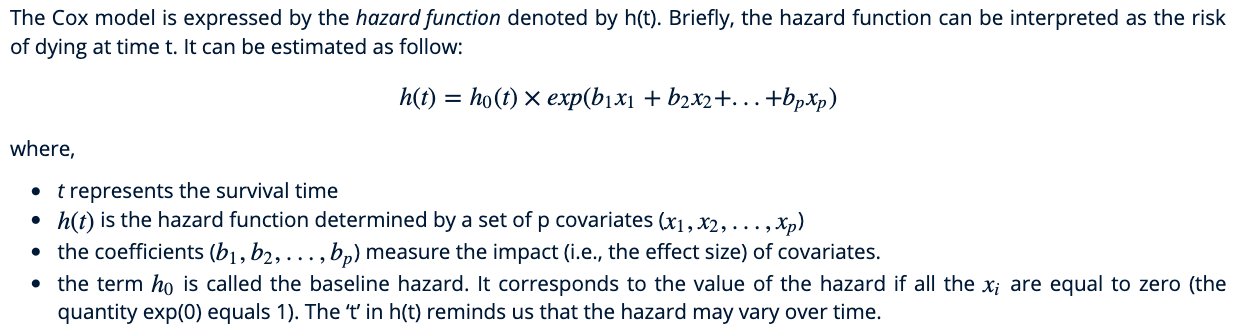

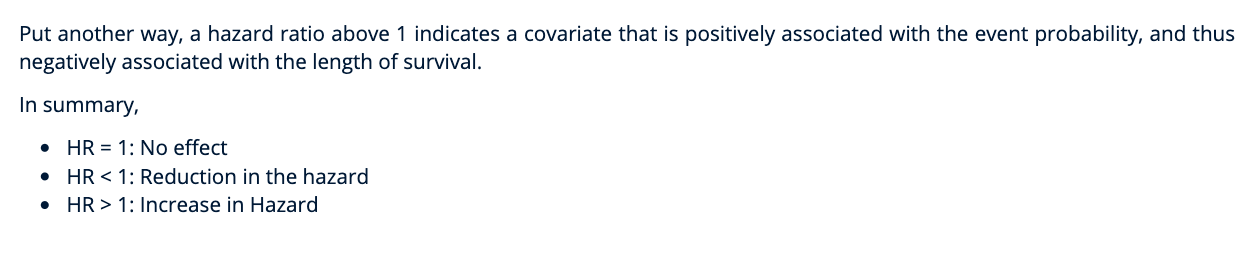

In [2]:
library("survival")
library("survminer")

Loading required package: ggplot2

Loading required package: ggpubr



In [3]:
data("lung")
head(lung)

,inst,time,status,age,sex,ph.ecog,ph.karno,pat.karno,meal.cal,wt.loss
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,3,306,2,74,1,1,90,100,1175,NA
2,3,455,2,68,1,0,90,90,1225,15
3,3,1010,1,56,1,0,90,90,NA,15
4,5,210,2,57,1,1,90,60,1150,11
5,1,883,2,60,1,0,100,90,NA,0
6,12,1022,1,74,1,1,50,80,513,0


In [4]:
lung

,inst,time,status,age,sex,ph.ecog,ph.karno,pat.karno,meal.cal,wt.loss
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,3,306,2,74,1,1,90,100,1175,NA
2,3,455,2,68,1,0,90,90,1225,15
3,3,1010,1,56,1,0,90,90,NA,15
4,5,210,2,57,1,1,90,60,1150,11
5,1,883,2,60,1,0,100,90,NA,0
6,12,1022,1,74,1,1,50,80,513,0
7,7,310,2,68,2,2,70,60,384,10
8,11,361,2,71,2,2,60,80,538,1
9,1,218,2,53,1,1,70,80,825,16


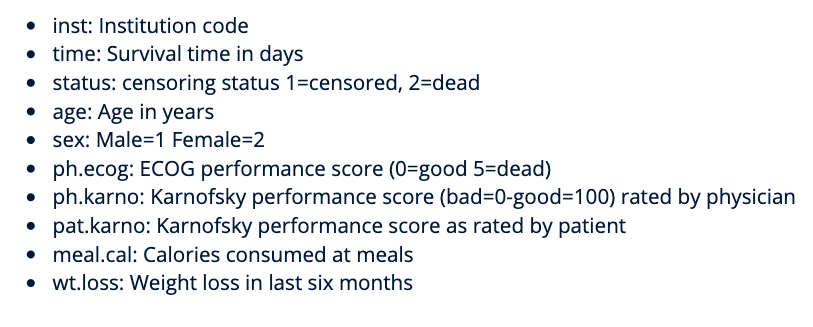

##Univariate Cox regression


In [5]:
res.cox <- coxph(Surv(time, status) ~ sex, data = lung)
res.cox

Call:
coxph(formula = Surv(time, status) ~ sex, data = lung)

       coef exp(coef) se(coef)      z       p
sex -0.5310    0.5880   0.1672 -3.176 0.00149

Likelihood ratio test=10.63  on 1 df, p=0.001111
n= 228, number of events= 165 

In [6]:
summary(res.cox)

Call:
coxph(formula = Surv(time, status) ~ sex, data = lung)

  n= 228, number of events= 165 

       coef exp(coef) se(coef)      z Pr(>|z|)   
sex -0.5310    0.5880   0.1672 -3.176  0.00149 **
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

    exp(coef) exp(-coef) lower .95 upper .95
sex     0.588      1.701    0.4237     0.816

Concordance= 0.579  (se = 0.021 )
Likelihood ratio test= 10.63  on 1 df,   p=0.001
Wald test            = 10.09  on 1 df,   p=0.001
Score (logrank) test = 10.33  on 1 df,   p=0.001


regression coefficient - (coef): positive sign means that the hazard (risk of death) is higher. The variable sex is encoded as a numeric vector. 1: male, 2: female. The R summary for the Cox model gives the hazard ratio (HR) for the second group relative to the first group, that is, female versus male. The beta coefficient for sex = -0.53 indicates that females have lower risk of death (higher survival rates) than males, in these data.

exponentiated coefficients (exp(coef) = exp(-0.53) = 0.59), also known as hazard ratios, give the effect size of covariates. For example, being female (sex=2) reduces the hazard by a factor of 0.59, or 41%. Being female is associated with good prognostic.

In [7]:
covariates <- c("age", "sex",  "ph.karno", "ph.ecog", "wt.loss")
univ_formulas <- sapply(covariates,
                        function(x) as.formula(paste('Surv(time, status)~', x)))
                        
univ_models <- lapply( univ_formulas, function(x){coxph(x, data = lung)})
# Extract data 
univ_results <- lapply(univ_models,
                       function(x){ 
                          x <- summary(x)
                          p.value<-signif(x$wald["pvalue"], digits=2)
                          wald.test<-signif(x$wald["test"], digits=2)
                          beta<-signif(x$coef[1], digits=2);#coeficient beta
                          HR <-signif(x$coef[2], digits=2);#exp(beta)
                          HR.confint.lower <- signif(x$conf.int[,"lower .95"], 2)
                          HR.confint.upper <- signif(x$conf.int[,"upper .95"],2)
                          HR <- paste0(HR, " (", 
                                       HR.confint.lower, "-", HR.confint.upper, ")")
                          res<-c(beta, HR, wald.test, p.value)
                          names(res)<-c("beta", "HR (95% CI for HR)", "wald.test", 
                                        "p.value")
                          return(res)
                          #return(exp(cbind(coef(x),confint(x))))
                         })
res <- t(as.data.frame(univ_results, check.names = FALSE))
as.data.frame(res)

,beta,HR (95% CI for HR),wald.test,p.value
,<chr>,<chr>,<chr>,<chr>
age,0.019,1 (1-1),4.1,0.042
sex,-0.53,0.59 (0.42-0.82),10,0.0015
ph.karno,-0.016,0.98 (0.97-1),7.9,0.005
ph.ecog,0.48,1.6 (1.3-2),18,2.7e-05
wt.loss,0.0013,1 (0.99-1),0.05,0.83


## Multivariate Cox regression analysis


In [8]:
res.cox <- coxph(Surv(time, status) ~ age + sex + ph.ecog, data =  lung)
summary(res.cox)

Call:
coxph(formula = Surv(time, status) ~ age + sex + ph.ecog, data = lung)

  n= 227, number of events= 164 
   (1 observation deleted due to missingness)

             coef exp(coef)  se(coef)      z Pr(>|z|)    
age      0.011067  1.011128  0.009267  1.194 0.232416    
sex     -0.552612  0.575445  0.167739 -3.294 0.000986 ***
ph.ecog  0.463728  1.589991  0.113577  4.083 4.45e-05 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

        exp(coef) exp(-coef) lower .95 upper .95
age        1.0111     0.9890    0.9929    1.0297
sex        0.5754     1.7378    0.4142    0.7994
ph.ecog    1.5900     0.6289    1.2727    1.9864

Concordance= 0.637  (se = 0.025 )
Likelihood ratio test= 30.5  on 3 df,   p=1e-06
Wald test            = 29.93  on 3 df,   p=1e-06
Score (logrank) test = 30.5  on 3 df,   p=1e-06


Warning message:
“Now, to change color palette, use the argument palette= '#2E9FDF' instead of color = '#2E9FDF'”


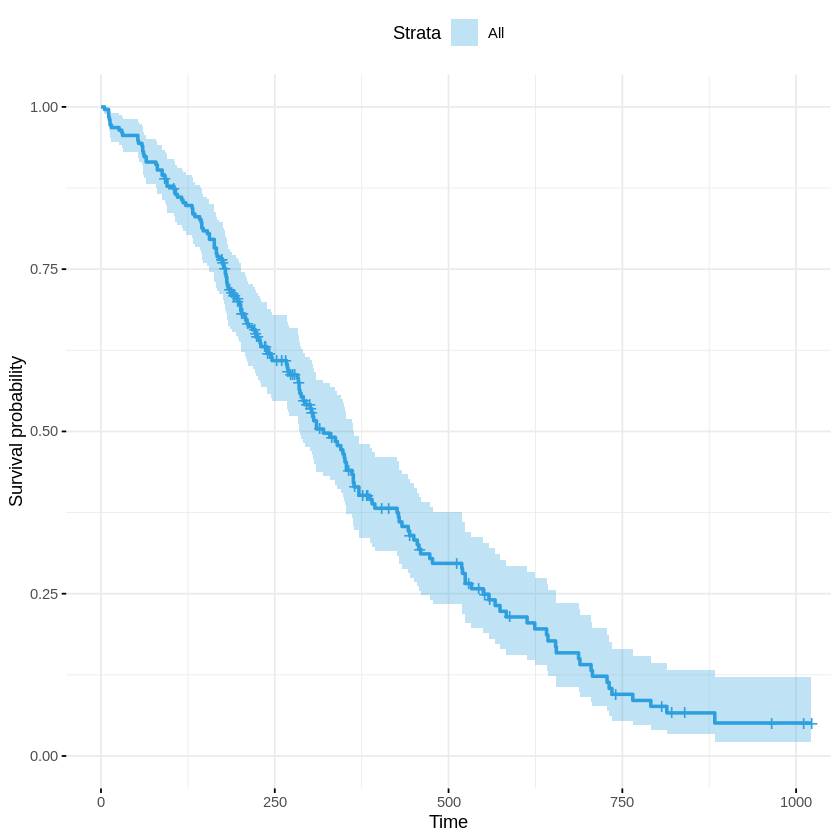

In [11]:
# Plot the baseline survival function
ggsurvplot(survfit(res.cox), color = "#2E9FDF",ggtheme = theme_minimal(), data=lung)

In [17]:
# Create the new data  
sex_df <- with(lung,
               data.frame(sex = c(1, 2), 
                          age = rep(mean(age, na.rm = TRUE), 2),
                          ph.ecog = c(1, 1)
                          )
               )
sex_df

sex,age,ph.ecog
<dbl>,<dbl>,<dbl>
1,62.44737,1
2,62.44737,1


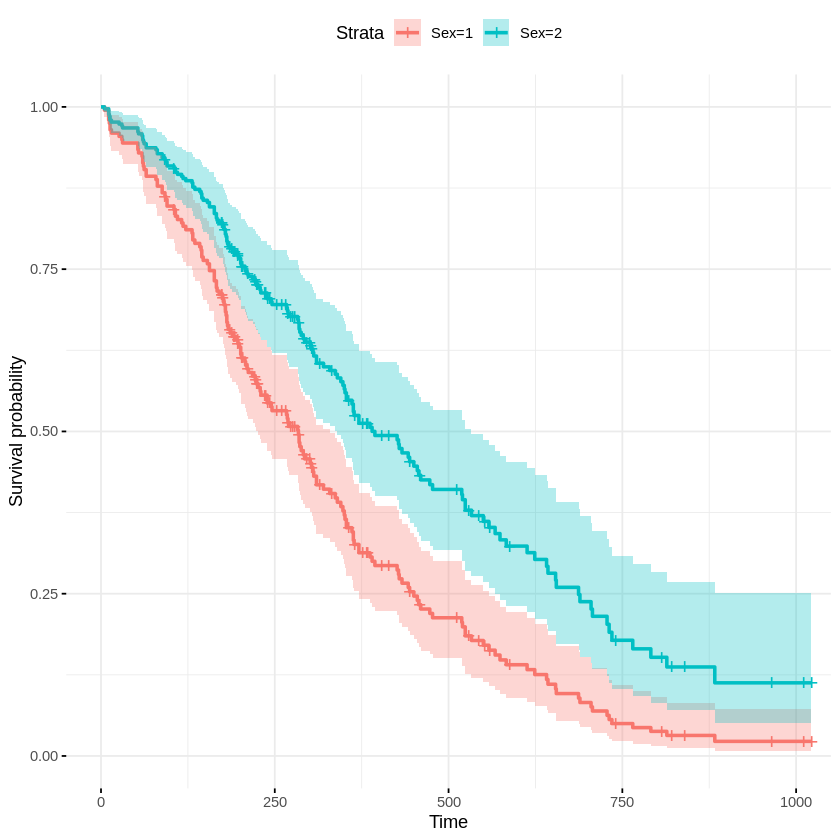

In [18]:
# Survival curves
fit <- survfit(res.cox, newdata = sex_df)
ggsurvplot(fit, conf.int = TRUE, legend.labs=c("Sex=1", "Sex=2"),data=lung,ggtheme = theme_minimal())

In [19]:
# Create the new data  
ecog_df <- with(lung,
               data.frame(sex = c(1, 1,1), 
                          age = rep(mean(age, na.rm = TRUE), 3),
                          ph.ecog = c(1, 2,3)
                          )
               )
ecog_df

sex,age,ph.ecog
<dbl>,<dbl>,<dbl>
1,62.44737,1
1,62.44737,2
1,62.44737,3


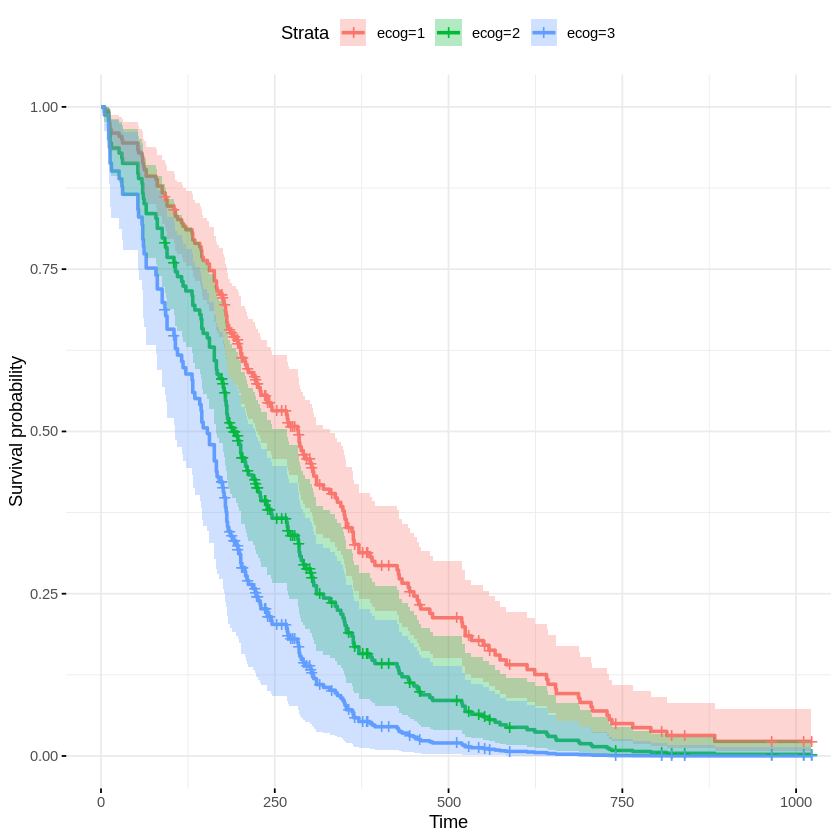

In [21]:
# Survival curves
fit <- survfit(res.cox, newdata = ecog_df)
ggsurvplot(fit, conf.int = TRUE, legend.labs=c("ecog=1", "ecog=2","ecog=3"),data=lung,ggtheme = theme_minimal())

In [24]:
#ref: http://www.sthda.com/english/wiki/cox-proportional-hazards-model